<br>
# ** 7 Predict the TimeSeries Data**
시계열 데이터 예측

### **review Data Datum**
1. Datum(숫자, "문자"), Data([list], {dict}, (tuple,))
1. (기본/외부/사용자) 모듈, 함수, 메소드
1. []의 문자에서 활용( [index], [:slicing]), 함수를 활용{for : 반복, if :판단, enumerate() :순번 integer 출력}
1. 재무제표 Web Crawling ==> type 변경 ==> 시각화
1. ndarray, Series, Dataframe

### **review Series**
1. pd.Series( [ data ] , index = [ index ])
1. series 사칙연산
1. series [ Boolean 판단문 ]
1. series.index = [ list ]
1. series.isnull()
1. series.drop()

### **review DataFrame**
1. pd.DataFrame( { columns :  [ data ] , columns :  [ data ] } )
1. pd.to_datetime()
1. df.rename( columns = { 기존 column , 새로운 column } )
1. df.insert( 컬럼순서,  컬럼명 ,  data )
1. df.column이름 &nbsp; | &nbsp; df['column이름']
1. df [ index Slicing ]
1. df.iloc[ index slicing,  column slicing ]
1. df.reset_index()        :  index  -> column
1. df.set_index( '컬럼명' ) :  column -> index
1. df.sort_index()
1. df.sort_value()
1. df[ boolean 함수 ]
1. df[ boolean 함수 ].column이름
1. axis = 0 : index | axis = 1 : column
1. df.drop( 'index이름'  , axis = 0 )
1. df.drop( 'column이름' ,  axis = 1 )
1. df.index.tolist()
1. df.column.tolist()
1. df.apply(lambda x: x ** 2)
1. pd.pivot_table(df,index = [], values = [], aggfunc = [], margins = True)

### **review DataFrame static**
1. .count()
1. .describe()
1. .min()     .max()
1. .idxmin()  .idxmax()
1. .quantile()   
1. .sum()
1. .mean()    .median()
1. .var() 분산 .std() 정규분산
1. .cumsum()  .cumprod()  누적 합    누적 곱
1. .cummin()  .cummax()   누적최소값, 누적최대값

### **review Series & DataFrame 결측치 제어하기**
1. df.dropna()
1. df.fillna(method='ffill',  limit=2)  # 결측치 대체
1. df.fillna(df.mean()['컬럼명'])   
1. Series.interpolate(method='time')    # 결측치 보간 (시계열적 특성을 부여가능)
1. Series.interpolate(method='values', limit=1, limit_direction='backward') # 'forward','backward','both'

### **review &nbsp; TimeSeries**
1. from datetime import datetime
1. pandas.date_range(end = '2017-07-01', periods=30, freq='BM')  
1. pandas.date_range('2017/8/8 09:09:09', periods=5, normalize=True)
1. [str(date.date()) &nbsp;&nbsp; for &nbsp;&nbsp; date &nbsp;&nbsp; in &nbsp;&nbsp; pd.date_range('2017/01/01', '2017/01/11')]

### **review &nbsp; Matplotlib**
1. DataFrame.loc['시작날짜':'종료날짜', :] : 주소 이름을 활용하여 인덱싱
1. DataFrame.iloc[1:10, : ] # 주소값으로 인덱싱
1. Series.plot(kind='line')  **# 'bar'**
1. Series.resample().plot()
1. Series.rolling().plot()
1. Series.ix['2018-01':'2018-03'].plot()
1. plt.figure(figsize=(,)); &nbsp;&nbsp; plt.plot(x축,y축,lw=1.5,label=); &nbsp;&nbsp; plt.legend(loc=); &nbsp;&nbsp; plt.show()
1. plt.figure(figsize=(,)); &nbsp;&nbsp; plt.subplot(121); &nbsp;&nbsp; plt.plot(); &nbsp;&nbsp; plt.subplot(122); &nbsp;&nbsp; plt.plot(); &nbsp;&nbsp; plot.show()

<br><br>
## **1 은닉 마르코프 모델을 활용 (HMM)**
1. Hidden Markov Model [개념설명|자연어](https://kimdoky.github.io/python/2017/07/30/crawling-book-chap8.html)
1. 순차적 데이터중 눈으로 관측 불가능한 내재(은닉)상태의 데이터를 처리하는 모델
1. 과거 데이터의 일련의 **상태전이 과정**을 거치면서 **모델을 생성**한다
1. **pip &nbsp; install &nbsp; --no-cache-dir &nbsp; hmmlearn &nbsp;**  cf)yFPE_jbuf 오류 발생시

<img src="https://kimdoky.github.io//img/post/python/crawling/p2c8_1.png" width='300' align='left'>

<br>
### **01 Pattern 이 분명한 데이터를 활용하여 은닉 마르코프 모델 생성 (HMM)**
은닉 마르코프 모델의 용도를 확인해본다

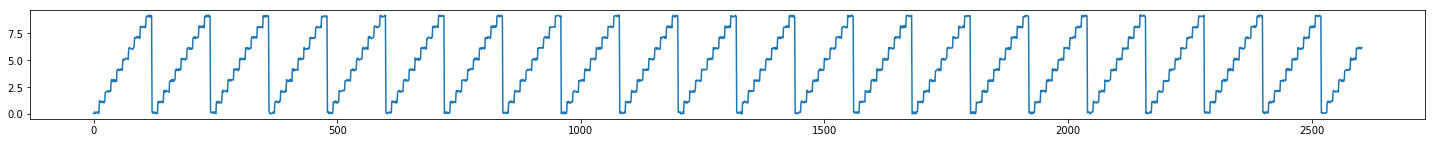

In [1]:
# pip install --no-cache-dir hmmlearn  
# cf)yFPE_jbuf 오류 발생시 설치방법
import numpy as np
from hmmlearn.hmm import GaussianHMM

data = np.loadtxt('./data/hmm_data.txt', delimiter=',')
X    = np.column_stack([data[:, 2]])
x    = [x[0] for x in X]

%matplotlib inline
import pandas as pd
pd.Series(x).plot(figsize=(25,2))

In [2]:
# 1. Create a Gaussian HMM
# 5 개의 Node를 갖고, 대각 공분산으로 구성
# algorithm = 'viterbi'
import warnings
warnings.filterwarnings("ignore")
num_components = 5
hmm = GaussianHMM(n_components    = num_components,
                  covariance_type = 'diag',
                  n_iter          = 1000)

# 2. HMM 모델에 Train 데이터를 적용
hmm.fit(X)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=5, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [3]:
for i in range(hmm.n_components):
    print('''Hidden state {:2} -  Mean : {:.3f} \\ Variance : {:.3f}'''.format(
        i+1, hmm.means_[i][0], np.diag(hmm.covars_[i])[0]))    

Hidden state  1 -  Mean : 6.586 \ Variance : 0.253
Hidden state  2 -  Mean : 2.600 \ Variance : 0.259
Hidden state  3 -  Mean : 8.596 \ Variance : 0.260
Hidden state  4 -  Mean : 4.598 \ Variance : 0.252
Hidden state  5 -  Mean : 0.603 \ Variance : 0.253


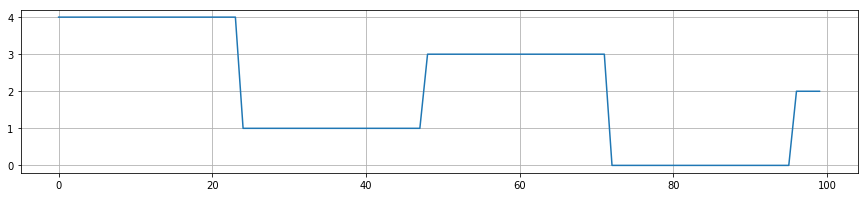

In [4]:
# 3. HMM 모델을 활용하여 예측데이터 생성하기
hidden_states = hmm.predict(X[:100])
pd.Series(hidden_states).plot(figsize=(15,3), grid=True)

<br>
### **02 주가 데이터를 활용한 은닉 마르코프 모델 생성 (HMM)**
by Stock Price Data

In [5]:
from googlefinance.get import get_data
stock = get_data('NASDAQ:FB', '1Y')
price = stock.close
price_array = np.asarray(price)
price_array = price_array.reshape(1, -1)
int(price.max())

193

In [6]:
# HMM 모델의 생성
# num_components : 데이터 예측범위가 0 ~ 10 사이의 값을 출력한다
num_components = 100
hmm            = GaussianHMM(n_components    = num_components,
                             covariance_type = 'diag',   
                             n_iter          = 1000)
# HMM 모델을 만든다 
hmm.fit(price_array.T)                                                

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=100, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

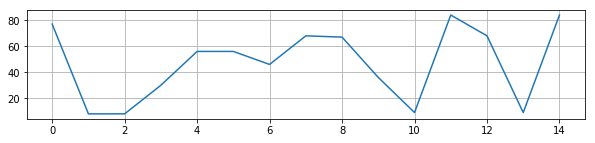

In [7]:
# HMM 모델을 활용하여 예측하기
hidden_states = hmm.predict(price_array.T[:15])
pd.Series(hidden_states).plot(figsize=(10,2), grid=True)

In [8]:
# 미래의 데이터를 생성은 했지만
# 이를 검증하는 방법은 앞에서 다룬 과거 데이터 분석방법을 통해서만 가능하다

<br><br>
## **2 ARIMA 시계열 분석을 활용한 주가예측**
**자기회귀 누적이동평균** | Auto Regressive Integrated Moving Average
1. **ARMA(자기회귀 이동평균)** 모형은 AR모델과 MA모델의 결합이다
1. **AR의 특성 (자기회귀)** 을 강하게 띄는 경우, **ACF(자기상관함수)는 천천히 감소**하고 PACF는 처음 시차를 제외하고 급격히 감소 한다.
1. **MA의 특성 (이동평균)** 을 강하게 띄는 경우, ACF는 급격히 감소하고 **PACF (부분자기함수)는 천천히 감소**

<br>
### ** 01-1. ACF & PACF Plots**
pip install --no-cache-dir statsmodels [Blog](https://byeongkijeong.github.io/ARIMA-with-Python/)
1. **ARMA(자기회귀 이동평균)** 모형은 AR모델과 MA모델의 결합이다
1. **AR의 특성** 을 띄는 경우, **ACF는 천천히 감소**하고 PACF는 처음 시차를 제외하고 급격히 감소 한다.
1. **MA의 특성** 을 띄는 경우, ACF는 급격히 감소하고 **PACF는 천천히 감소**

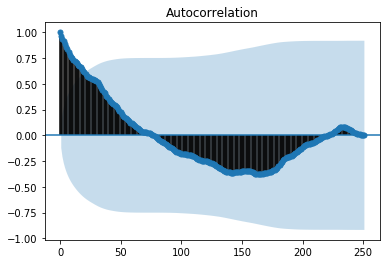

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plot_acf(price); plt.show()
# ACF (자기회귀 특성) : 불규칙한 요동을 친다

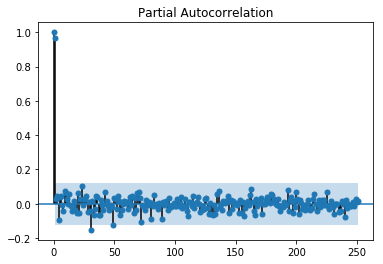

In [10]:
plot_pacf(price); plt.show()
# PACF (이동평균 특성) 급격히 떨어진 뒤 완만한 폭에서 변동을 갖는다

<br>
### ** 01-2. ACF & PACF Plots 2**
차분 .diff() 데이터를 사용하여 분석하기

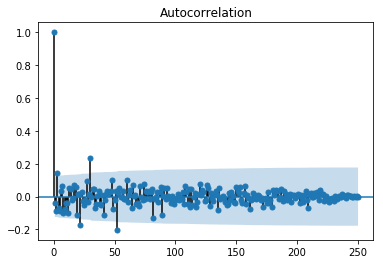

In [11]:
# 1차 차분(Diff)한 뒤 변화를 살펴본다
# ACF (자기회귀 특성) : 상대적으로 안정적인 데이터로 전환
diff_1 = price.diff(periods=1).dropna()#.iloc[1:]
plot_acf(diff_1); plt.show()

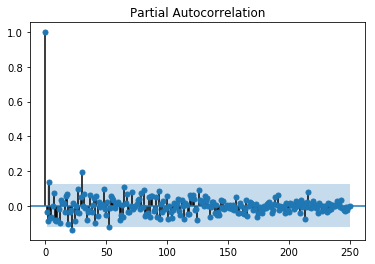

In [12]:
plot_pacf(diff_1); plt.show()
# 차분 이후의 ACF, PACF를 본 결과 PACF 경향이 더 도드라 진다
# PCAF가 안전된 만큼, MA 성향이 더 도드라 진다

<br>
### ** 02 ARIMA 모형 구축**
1차 차분으로도, 정상상태(Stationary)를 보이므로 ARIMA(0,1,1)을 사용

In [13]:
from statsmodels.tsa.arima_model import ARIMA

model     = ARIMA (price, order = (0, 1, 1))
model_fit = model.fit(trend = 'c', full_output = True, disp = 1)
print(model_fit.summary())
# P > |z| P-value 값이 1차차분결과 0.5보다 크므로 정규성이 인정된다

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  251
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -599.148
Method:                       css-mle   S.D. of innovations              2.633
Date:                Thu, 19 Apr 2018   AIC                           1204.297
Time:                        19:27:23   BIC                           1214.873
Sample:                    04-21-2017   HQIC                          1208.553
                         - 04-19-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0961      0.159      0.606      0.545      -0.215       0.407
ma.L1.D.close    -0.0454      0.068     -0.669      0.504      -0.179       0.088
                                    Root

In [14]:
model = ARIMA(price, order = (0,1,3))
model_fit = model.fit(trend = 'c', full_output = True, disp = 1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  251
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -596.073
Method:                       css-mle   S.D. of innovations              2.601
Date:                Thu, 19 Apr 2018   AIC                           1202.145
Time:                        19:27:23   BIC                           1219.773
Sample:                    04-21-2017   HQIC                          1209.239
                         - 04-19-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0972      0.169      0.574      0.567      -0.235       0.429
ma.L1.D.close    -0.0066      0.063     -0.105      0.916      -0.130       0.117
ma.L2.D.close    -0.0896      0.070     

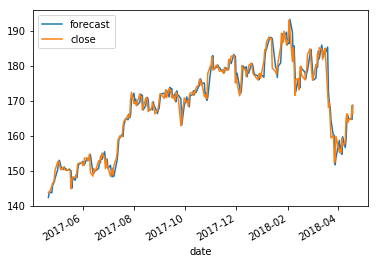

In [15]:
# 위에서 생성한 모델을 사용하여 주가를 예측한다
model_fit.plot_predict(); plt.show()

주가예측 : [166.08927201 166.9146927  166.70584141 166.80299358 166.90014576
 166.99729794 167.09445011 167.19160229 167.28875447 167.38590665] 
stderr : 2.6005423892843478 
upper bound : 160.99230259059593 
lower bound : 171.18624143713006


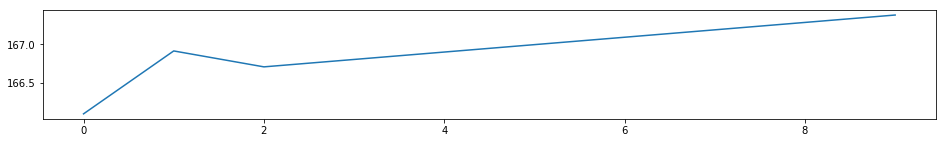

In [16]:
#  마지막 예측값을 수치화 한다
fore = model_fit.forecast(steps = 10)
print('주가예측 : {} \nstderr : {} \nupper bound : {} \nlower bound : {}'.format(
    fore[0], 
    fore[1][0], 
    fore[2][0][0], 
    fore[2][0][1]))
pd.Series(fore[0]).plot(figsize=(16,2))

<br><br>
## ** 3 prophet 모듈의 활용**
pip install --no-cache-dir  fbprophet
1. [웹사이트](https://facebook.github.io/prophet/)
1. R 에서 유명한 모듈
1. Value At Risk 유효범위내 주가변동을 예측한다
1. https://facebook.github.io/prophet/docs/quick_start.html#python-api
1. https://github.com/WillKoehrsen/Data-Analysis/blob/master/stocker/stocker.py
1. https://github.com/kumaranvpl/predict_stock_price/blob/master/predict_stock.py
1. https://towardsdatascience.com/stock-prediction-in-python-b66555171a2

<br>
### ** 01 prophet 모델 만들기**
'ds', 'y' 로 컬럼명을 수정해야 입력 포맷이 완성된다

In [17]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

df         = stock.reset_index()
df         = df.filter(['date', 'close'] , axis=1)
df.columns = ['ds', 'y']
df['y']    = np.log(df['y'])

# 예측 모델 만들기
# daily_seasonality = True : 시간별 자료가 제공시 활성화 한다
m = Prophet(yearly_seasonality = True)
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<br>
### ** 02 예측 데이터 생성하기**
num_days : 예측일 입력

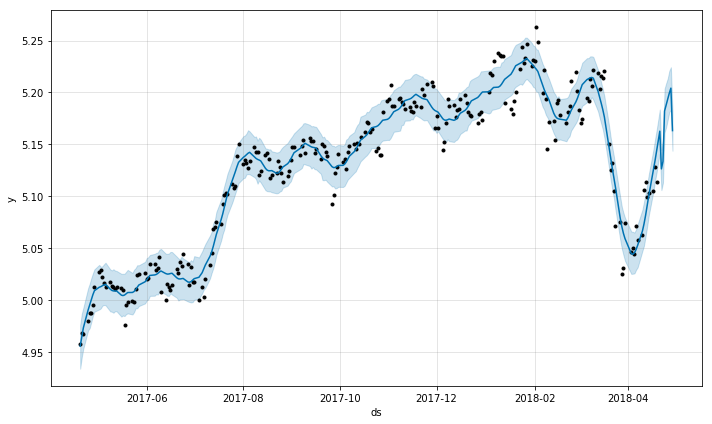

In [18]:
# 주가 예측기간 정의하기
num_days = 10
future   = m.make_future_dataframe(periods = num_days)
forecast = m.predict(future)
plt      = m.plot(forecast)
plt.show()

In [19]:
forecast.columns
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

Index(['ds', 'trend', 'trend_lower', 'trend_upper', 'yhat_lower', 'yhat_upper',
       'seasonal', 'seasonal_lower', 'seasonal_upper', 'seasonalities',
       'seasonalities_lower', 'seasonalities_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'yhat'],
      dtype='object')

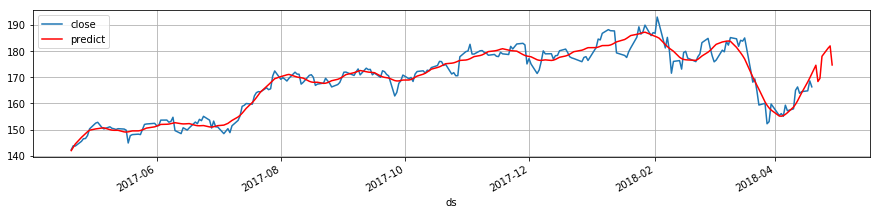

In [20]:
# log 데이터를 실제 주가데이터로 변환
forecast['close'] = round(np.exp(forecast.yhat), 2)

df_predict = forecast.filter(['ds', 'close'])
df_predict = df_predict.set_index('ds')

stock.close.plot(label='close', figsize=(15,3), legend=True)
df_predict.close.plot(label='predict', grid=True, color='red', legend=True)

<br>
### ** 03 결과 보고서 시각화**
모델분석 Report 출력하기

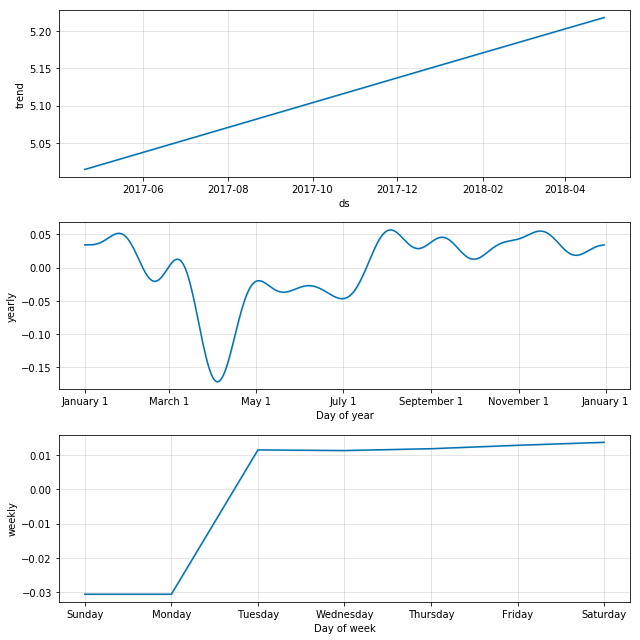

In [21]:
# 모델분석 Report 출력하기
plt = m.plot_components(forecast)
plt.show()

<br><br>
## ** 4 Keras 를 활용한 주가예측**
[Kaggle 주가분석](https://www.kaggle.com/pablocastilla/predict-stock-prices-with-lstm)
1. Python Code : https://github.com/NourozR/Stock-Price-Prediction-LSTM/blob/master/StockPricePrediction.py
1. https://lilianweng.github.io/lil-log/2017/07/08/predict-stock-prices-using-RNN-part-1.html
1. https://www.kaggle.com/pablocastilla/predict-stock-prices-with-lstm
1. https://github.com/etai83/lstm_stock_prediction/blob/master/.ipynb_checkpoints/GOOGLE%20stock%20prediction-checkpoint.ipynb

<br>
### ** 01 데이터 전처리**
주가의 종가데이터 전처리

In [22]:
from googlefinance.get import get_data
stock = get_data('NASDAQ:FB', '6Y')
dataset = stock.reset_index() # [::-1]  # 시간의 순서를 역으로 바꾸기
del dataset['code']
del dataset['date']
del dataset['volume']
dataset.columns = ['Open','High','Low','Close']
dataset.head(2)

,Open,High,Low,Close
0,0.00,0.0,0.0,38.0000
1,42.05,45.0,38.0,38.2318


In [23]:
# 관련 라이브러리 호출
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM

Using TensorFlow backend.


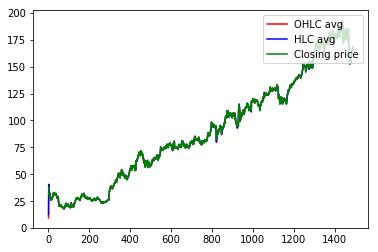

In [24]:
# dataset = pd.read_csv('https://github.com/NourozR/Stock-Price-Prediction-LSTM/raw/master/apple_share_price.csv', usecols=[1,2,3,4])
# dataset = dataset.reindex(index = dataset.index[::-1])

np.random.seed(7)  # 난수 생성을 위한 Seed값 생성
obs       = np.arange(1, len(dataset) + 1, 1) # CREATING OWN INDEX FOR FLEXIBILITY
OHLC_avg  = dataset.mean(axis = 1)            # TAKING DIFFERENT INDICATORS FOR PREDICTION
HLC_avg   = dataset[['High', 'Low', 'Close']].mean(axis = 1)
close_val = dataset[['Close']]

# PLOTTING ALL INDICATORS IN ONE PLOT
plt.plot(obs, OHLC_avg,  'r', label = 'OHLC avg')
plt.plot(obs, HLC_avg,   'b', label = 'HLC avg')
plt.plot(obs, close_val, 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
plt.show()

In [25]:
def new_dataset(dataset, step_size):
    # 시계열 데이터를 1차원 Array() 로 변환
    import numpy as np 
    data_X, data_Y = [], []
    for i in range(len(dataset)-step_size-1):
        a = dataset[i:(i+step_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + step_size, 0])
    return np.array(data_X), np.array(data_Y)

# PREPARATION OF TIME SERIES DATASE
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) # 1664
scaler   = MinMaxScaler(feature_range=(0, 1))
OHLC_avg = scaler.fit_transform(OHLC_avg)

# TRAIN-TEST SPLIT
train_OHLC = int(len(OHLC_avg) * 0.75)
test_OHLC  = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
trainX, trainY = new_dataset(train_OHLC, 1)
testX, testY   = new_dataset(test_OHLC, 1)

# RESHAPING TRAIN AND TEST DATA
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX  = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
step_size = 1

<br>
### ** 02 LSTM 모델 만들기**
주가의 종가데이터 전처리

In [26]:
# LSTM MODEL
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adagrad') # Try SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
 - 9s - loss: 0.0057
Epoch 2/5
 - 7s - loss: 2.2142e-04
Epoch 3/5
 - 7s - loss: 1.9687e-04
Epoch 4/5
 - 7s - loss: 1.7901e-04
Epoch 5/5
 - 7s - loss: 1.6364e-04


In [27]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict  = model.predict(testX)

# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY       = scaler.inverse_transform([trainY])
testPredict  = scaler.inverse_transform(testPredict)
testY        = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))   # Train 모델 RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test  RMSE: %.2f' % (testScore))     # Test 모델 RMSE

Train RMSE: 2.25
Test RMSE: 10.93


<br>
### ** 03 LSTM 모델 만들기**
주가의 종가데이터 전처리

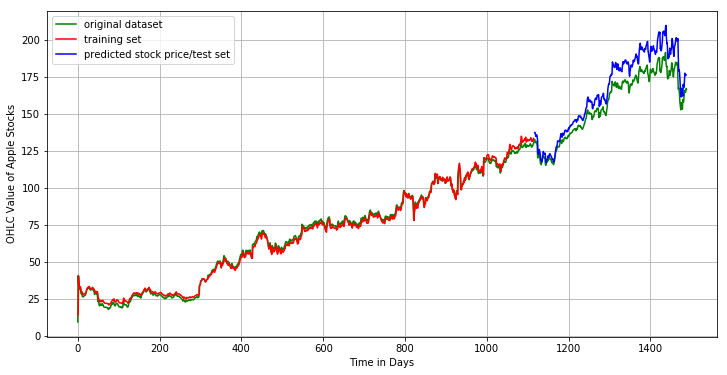

In [28]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot       = np.empty_like(OHLC_avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size : len(trainPredict)+step_size, :] = trainPredict

# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot       = np.empty_like(OHLC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict

# DE-NORMALIZING MAIN DATASET 
OHLC_avg = scaler.inverse_transform(OHLC_avg)

# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.figure(figsize=(12,6))
plt.plot(OHLC_avg,         'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot,  'b', label = 'predicted stock price/test set')
plt.xlabel('Time in Days');     plt.ylabel('OHLC Value of Apple Stocks')
plt.legend(loc = 'upper left'); plt.grid(); plt.show()

In [33]:
# PREDICT FUTURE VALUES
last_val        = testPredict[-1:]
last_val_scaled = last_val/last_val
next_val        = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print ("Last Day Value:", np.asscalar(last_val))
print ("Next Day Value:", np.asscalar(last_val * next_val))

Last Day Value: 176.3994903564453
Next Day Value: 194.04635620117188
